# Data Analysis Report on Physical Activity Monitoring

## TABLE OF CONTENTS

1. Introduction
2. Loading the data
3. Data Cleaning
4. Exploratory Data Analysis
5. Hypothesis Testing
 - Hypothesis 1
 - Hypothesis 2
6. Modelling
7. Conclusion
8. References

# 1. Introduction

This data set is gathered from 2 papers published by A. Resis and D. Stricker in 2012: Introducing a New Benchmarked Dataset for Activity Monitoring and Creating and Benchmarking a New Dataset for Physical Activity Monitoring.

There were 9 subjects which participated in the data collection, 1 female and 8 males. These participants were mainly students or employees at DFKI aged between 27.22 ± 3.31 years and BMI between 25.11 ± 2.62 kgm-2.

The participants were wearing sensors on their dominant arm(mentioned in subjectInformation.pdf), chest and on the dominant side's ankle. They were also wearing HR(heartrate) monitor having a sampling frequency of 9Hz.

Each of these sensors generated 5 different measurements:
- 3D-acceleration data (ms-2), scale: ±16g, resolution: 13-bit
- 3D-acceleration data (ms-2), scale: ±6g, resolution: 13-bit*
- 3D-gyroscope data (rad/s)
- 3D-magnetometer data (μT)
- orientation

The participants were involved in performing 18 different activities
- lying
- sitting
- standing
- walking
- running
- cycling
- Nordic walking
- watching television
- computer work
- car driving
- ascending stairs
- descending stairs
- vacuum cleaning
- ironing
- folding laundry
- house cleaning
- playing soccer
- rope jumping

The outcome of this report is to develop the hardware or software which will be able to predict the heart rate and physical activity carried by a person.
The report has 3 objectives:
1. To perform an in depth exploratory data analysis and handle the missing data.
2. To develop and test at least one hypothesis
3. To develop and test at leat one model to make predictions



# 2. Loading the data

All the necessary libraries which will be used for the analysis are imported.

In [7]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as Agg
from scipy.cluster import hierarchy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, adjusted_rand_score
import warnings

In [8]:
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

A list,"files_list" is created which will load all the files from our local directory to create a dataframe. A dictionary "activity_protocol" is also created which has all the activities listed above performed by the participants. This dictionary will be used to analyse the activity to get the insights. 

In [9]:
#creating a list of files
#change the directory according to the machine
files_list = ['/Users/eneuagbale/Documents/DSRM/Dataset/Protocol/subject101.dat',
              '/Users/eneuagbale/Documents/DSRM/Dataset/Protocol/subject102.dat',
              '/Users/eneuagbale/Documents/DSRM/Dataset/Protocol/subject103.dat',
              '/Users/eneuagbale/Documents/DSRM/Dataset/Protocol/subject104.dat',
              '/Users/eneuagbale/Documents/DSRM/Dataset/Protocol/subject105.dat',
              '/Users/eneuagbale/Documents/DSRM/Dataset/Protocol/subject106.dat',
              '/Users/eneuagbale/Documents/DSRM/Dataset/Protocol/subject107.dat',
              '/Users/eneuagbale/Documents/DSRM/Dataset/Protocol/subject108.dat',
              '/Users/eneuagbale/Documents/DSRM/Dataset/Protocol/subject109.dat']


ID_subject = [1,2,3,4,5,6,7,8,9]

activity_protocol =  {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }


column_names = ["timestamp", "activityID","heartrate",'handTemperature', 'handAcc16_1', 'handAcc16_2',
            'handAcc16_3','handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1', 'handGyro2',
            'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3','handOrientation1', 'handOrientation2',
            'handOrientation3', 'handOrientation4','chestTemperature', 'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3', 
           'chestMagne1', 'chestMagne2', 'chestMagne3','chestOrientation1', 'chestOrientation2', 'chestOrientation3',
            'chestOrientation4','ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1',
            'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 'ankleMagne1',
            'ankleMagne2', 'ankleMagne3','ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

columns = column_names 

In [10]:
#saving the data in the dataframe "pamp"
pamp = pd.DataFrame()
for file in files_list:
    procData = pd.read_table(file, header=None, sep='\s+')
    procData.columns = columns
    procData['subject_id'] = int(file[-5])
    pamp = pamp.append(procData, ignore_index=True)

pamp.reset_index(drop=True, inplace=True)

In [11]:
print(pamp.columns) 

Index(['timestamp', 'activityID', 'heartrate', 'handTemperature',
       'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2',
       'handOrientation3', 'handOrientation4', 'chestTemperature',
       'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3', 'chestOrientation1',
       'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
       'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
       'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2',
       'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
       'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3',
       'ankleOrientation4', 'subject_id'],
      dtype=

In [13]:
pamp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872533 entries, 0 to 2872532
Data columns (total 55 columns):
 #   Column             Dtype  
---  ------             -----  
 0   timestamp          float64
 1   activityID         int64  
 2   heartrate          float64
 3   handTemperature    float64
 4   handAcc16_1        float64
 5   handAcc16_2        float64
 6   handAcc16_3        float64
 7   handAcc6_1         float64
 8   handAcc6_2         float64
 9   handAcc6_3         float64
 10  handGyro1          float64
 11  handGyro2          float64
 12  handGyro3          float64
 13  handMagne1         float64
 14  handMagne2         float64
 15  handMagne3         float64
 16  handOrientation1   float64
 17  handOrientation2   float64
 18  handOrientation3   float64
 19  handOrientation4   float64
 20  chestTemperature   float64
 21  chestAcc16_1       float64
 22  chestAcc16_2       float64
 23  chestAcc16_3       float64
 24  chestAcc6_1        float64
 25  chestAcc6_2       

In [14]:
pamp.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,-0.092217,0.056812,-0.015845,14.6806,-69.2128,-5.58905,1.0,0.0,0.0,0.0,31.8125,0.238080,9.80003,-1.68896,0.265304,9.81549,-1.41344,-0.005065,-0.006781,-0.005663,0.471960,-51.0499,43.2903,1.0,0.0,0.0,0.0,30.3125,9.65918,-1.65569,-0.099797,9.64689,-1.55576,0.310404,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,-0.024413,0.047759,0.006474,14.8991,-69.2224,-5.82311,1.0,0.0,0.0,0.0,31.8125,0.319530,9.61282,-1.49328,0.234939,9.78539,-1.42846,0.013685,0.001486,-0.041522,1.016900,-50.3966,43.1768,1.0,0.0,0.0,0.0,30.3125,9.69370,-1.57902,-0.215687,9.61670,-1.61630,0.280488,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,-0.057976,0.032574,-0.006988,14.2420,-69.5197,-5.12442,1.0,0.0,0.0,0.0,31.8125,0.235593,9.72421,-1.76621,0.173850,9.72528,-1.51894,-0.039923,0.034056,-0.002113,0.383136,-51.8336,43.7782,1.0,0.0,0.0,0.0,30.3125,9.58944,-1.73276,0.092914,9.63173,-1.58605,0.280311,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,-0.002352,0.032810,-0.003747,14.8908,-69.5439,-6.17367,1.0,0.0,0.0,0.0,31.8125,0.388697,9.53572,-1.72410,0.157969,9.64994,-1.57952,0.007513,-0.010498,-0.020684,0.315400,-49.8144,43.1670,1.0,0.0,0.0,0.0,30.3125,9.58814,-1.77040,0.054545,9.63197,-1.63135,0.340997,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,0.012269,0.018305,-0.053325,15.5612,-68.8196,-6.28927,1.0,0.0,0.0,0.0,31.8125,0.315800,9.49908,-1.60914,0.233506,9.57411,-1.44418,-0.003822,-0.011217,-0.025975,-0.297733,-51.8097,43.6453,1.0,0.0,0.0,0.0,30.3125,9.69771,-1.65625,-0.060809,9.64699,-1.64647,0.340965,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


# 3. Data Cleaning

The dataset has 55 columns. There is a need to clean the data before loading these variables into the model. For example as stated in the data reference file, activity where it is 0, need to be removed because the participant  performed transient activities between performing different activities.

By analyzing the PerformedActivitiesSummary file, it can be noticed that there are many values missing due to disconnection of the sensors during the collection of the data set. One key thing to notice as well is that almost all of the activites are performed by less than 9 subjects that's why there are NaN values in the data set. So, it is important to take care of these missing values.

Checking how many missing values are in the data set. The missing values indicated that wireless connection problems as stated in the files.

In [15]:
#how many null values are in the respective column
pamp.isnull().sum()

timestamp                  0
activityID                 0
heartrate            2610265
handTemperature        13141
handAcc16_1            13141
handAcc16_2            13141
handAcc16_3            13141
handAcc6_1             13141
handAcc6_2             13141
handAcc6_3             13141
handGyro1              13141
handGyro2              13141
handGyro3              13141
handMagne1             13141
handMagne2             13141
handMagne3             13141
handOrientation1       13141
handOrientation2       13141
handOrientation3       13141
handOrientation4       13141
chestTemperature        3563
chestAcc16_1            3563
chestAcc16_2            3563
chestAcc16_3            3563
chestAcc6_1             3563
chestAcc6_2             3563
chestAcc6_3             3563
chestGyro1              3563
chestGyro2              3563
chestGyro3              3563
chestMagne1             3563
chestMagne2             3563
chestMagne3             3563
chestOrientation1       3563
chestOrientati

I checked that how many columns in this data set are non-numeric. The non-numeric columns needs to be changed to numeric, so that data pre-processing becomes easy for the data scientist.

In [16]:
#Checking how many columns are non-numeric
for column in pamp:
    print("column name: ", column, column.isalpha())

column name:  timestamp True
column name:  activityID True
column name:  heartrate True
column name:  handTemperature True
column name:  handAcc16_1 False
column name:  handAcc16_2 False
column name:  handAcc16_3 False
column name:  handAcc6_1 False
column name:  handAcc6_2 False
column name:  handAcc6_3 False
column name:  handGyro1 False
column name:  handGyro2 False
column name:  handGyro3 False
column name:  handMagne1 False
column name:  handMagne2 False
column name:  handMagne3 False
column name:  handOrientation1 False
column name:  handOrientation2 False
column name:  handOrientation3 False
column name:  handOrientation4 False
column name:  chestTemperature True
column name:  chestAcc16_1 False
column name:  chestAcc16_2 False
column name:  chestAcc16_3 False
column name:  chestAcc6_1 False
column name:  chestAcc6_2 False
column name:  chestAcc6_3 False
column name:  chestGyro1 False
column name:  chestGyro2 False
column name:  chestGyro3 False
column name:  chestMagne1 False
c

- First, the orientation columns are dropped because these points were invalid for the data analysis as stated in data set file.
- Second, in the file it was stated that activity 0 should be discarded because this value covers mainly the transient activities between performing different activities making the data points irrelevant for the analysis, so, all the rows where the activity ID was 0 is dropped.
- The non-numeric columns are then converted to the numeric because machine learning algorithms require numeric input for training. Converting the non-numeric columns to numeric will help in the application of mathematical operations.
- The best way to fill the data depends on the kind of data, the amount of missing data. There are many methods to fill the missing data like mean, median, mode, forward/backward fill, interpolation and etc. However,in this case interpolation method will be employed to fill the missing data. Reason to apply this methodology is that our data set contains continuous values. Those values matter and interpolation fills the in the way that it generates new point out of the known values.

All these data cleaning process are written in a function 'cleaning'.

In [17]:
#A function is created to clean the whole data set
def cleaning(pamp):
    #dropping the unnecessary variables
    pamp = pamp.drop(['handOrientation1','handOrientation2','handOrientation3','handOrientation4','chestOrientation1','chestOrientation2','chestOrientation3','chestOrientation4','ankleOrientation1','ankleOrientation2','ankleOrientation3','ankleOrientation4'],axis = 1)
    #dropping activityID = 0 as it is not that important
    pamp = pamp.drop(pamp.loc[pamp['activityID'] == 0].index)
    #converting the non-numeric columns to numeric
    pamp = pamp.apply(pd.to_numeric,errors = 'coerce')
    #generating new data values using interpolation method to fill missing values
    pamp = pamp.interpolate()
    
    return pamp

In [18]:
#calling the function
cleaned_pamp = cleaning(pamp)

In [19]:
cleaned_pamp.reset_index(drop = True,inplace = True)

In [20]:
cleaned_pamp.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
0,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,32.1875,0.124482,9.65003,-1.65181,0.143941,9.71019,-1.47347,0.036668,0.016559,-0.052791,0.567566,-50.7269,44.2728,30.75,9.73855,-1.84761,0.095156,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
1,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,32.1875,0.200711,9.64980,-1.65043,0.129092,9.74041,-1.47329,0.019343,-0.024304,-0.059843,0.904990,-50.5080,43.5427,30.75,9.69762,-1.88438,-0.020804,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,32.1875,0.270277,9.72331,-1.88174,0.144685,9.77048,-1.41285,-0.001428,0.038466,-0.046464,0.455480,-50.7209,44.0259,30.75,9.69633,-1.92203,-0.059173,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
3,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,32.1875,0.236737,9.72447,-1.72746,0.174402,9.75538,-1.45841,0.017277,-0.048547,-0.074946,0.324284,-50.1544,43.6570,30.75,9.66370,-1.84714,0.094385,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,32.1875,0.352225,9.72437,-1.68665,0.173568,9.69512,-1.53414,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,30.75,9.77578,-1.88582,0.095775,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1


In [21]:
#checking the null values again after data cleaning
cleaned_pamp.isnull().sum()

timestamp           0
activityID          0
heartrate           4
handTemperature     0
handAcc16_1         0
handAcc16_2         0
handAcc16_3         0
handAcc6_1          0
handAcc6_2          0
handAcc6_3          0
handGyro1           0
handGyro2           0
handGyro3           0
handMagne1          0
handMagne2          0
handMagne3          0
chestTemperature    0
chestAcc16_1        0
chestAcc16_2        0
chestAcc16_3        0
chestAcc6_1         0
chestAcc6_2         0
chestAcc6_3         0
chestGyro1          0
chestGyro2          0
chestGyro3          0
chestMagne1         0
chestMagne2         0
chestMagne3         0
ankleTemperature    0
ankleAcc16_1        0
ankleAcc16_2        0
ankleAcc16_3        0
ankleAcc6_1         0
ankleAcc6_2         0
ankleAcc6_3         0
ankleGyro1          0
ankleGyro2          0
ankleGyro3          0
ankleMagne1         0
ankleMagne2         0
ankleMagne3         0
subject_id          0
dtype: int64

There 4 NaN values in the heartrate column after the interpolation method because interpolation requires closest data values on both sides to estimate the value accurately. As there are ony 4 rows having NaN values, I can drop these rows as it will not affect the whole analysis.

In [22]:
#dropping any null values
cleaned_pamp.dropna(how = 'any',inplace = True)

In [23]:
cleaned_pamp.reset_index(drop = True,inplace = True)

In [24]:
cleaned_pamp.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
0,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,32.1875,0.352225,9.72437,-1.68665,0.173568,9.69512,-1.53414,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,30.75,9.77578,-1.88582,0.095775,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1
1,37.71,1,100.0,30.375,2.07165,7.25965,6.01218,2.19238,7.21038,6.01604,0.063895,0.007175,0.024701,8.60505,-66.7184,-19.8429,32.1875,0.271221,9.64826,-1.84275,0.188981,9.72523,-1.50392,-0.002481,-0.018131,-0.045486,1.010820,-50.4054,44.1573,30.75,9.65780,-1.92147,-0.098161,9.60177,-1.75239,0.311276,0.003793,-0.026906,0.004125,-61.3257,-36.9744,-57.7501,1
2,37.72,1,100.0,30.375,2.41148,7.59780,5.93915,2.23988,7.46679,6.03053,0.190837,0.003116,0.038762,9.16003,-66.8578,-19.9665,32.1875,0.274553,9.61139,-1.72641,0.158971,9.67993,-1.44342,0.024609,-0.022451,-0.033739,1.261700,-50.9669,43.5475,30.75,9.65839,-1.80756,-0.098862,9.67694,-1.76748,0.326060,0.036814,-0.032277,-0.006866,-61.5520,-36.9632,-57.9957,1
3,37.73,1,100.0,30.375,2.32815,7.63431,5.70686,2.31663,7.64745,6.01495,0.200328,-0.009266,0.068567,9.47898,-67.3025,-20.6693,32.1875,0.238925,9.68733,-1.64986,0.173916,9.66480,-1.44355,0.012477,-0.000388,-0.031705,0.355493,-51.1679,44.3915,30.75,9.65690,-1.88318,-0.136998,9.61685,-1.76749,0.326380,-0.010352,-0.016621,0.006548,-61.5738,-36.1724,-59.3487,1
4,37.74,1,100.0,30.375,2.25096,7.78598,5.62821,2.28637,7.70801,5.93935,0.204098,-0.068256,0.050000,9.15218,-67.0705,-20.3159,32.1875,0.349738,9.64854,-1.76389,0.188777,9.66481,-1.47387,0.017892,-0.018287,-0.037089,0.125653,-50.9288,43.5303,30.75,9.77727,-1.81020,0.133911,9.61686,-1.72212,0.326234,0.039346,0.020393,-0.011880,-61.7741,-37.1744,-58.1199,1


# 4. Exploratory Data Analysis

In [25]:
cleaned_pamp.describe()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
count,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06,1.942868e+06
mean,1.705205e+03,8.081845e+00,1.074879e+02,3.275126e+01,-4.952988e+00,3.585071e+00,3.602227e+00,-4.886301e+00,3.573588e+00,3.786926e+00,1.481293e-03,3.974587e-02,-3.182856e-03,2.114701e+01,-1.396820e+01,-2.437035e+01,3.617909e+01,3.333709e-01,8.152680e+00,-1.450553e+00,1.993198e-01,8.148286e+00,-1.121257e+00,5.575008e-03,1.174626e-02,-2.290160e-02,4.470590e+00,-3.065304e+01,4.585257e+00,3.371195e+01,9.408387e+00,-1.531903e-01,-2.592438e+00,9.378477e+00,-4.549801e-02,-2.174218e+00,9.960353e-03,-3.652769e-02,6.658551e-03,-3.158965e+01,1.397038e+00,1.725055e+01,4.566395e+00
std,1.093461e+03,6.174787e+00,2.699218e+01,1.794161e+00,6.239660e+00,6.893710e+00,3.956960e+00,6.245970e+00,6.589670e+00,3.942863e+00,1.332333e+00,9.562321e-01,1.598820e+00,2.380843e+01,2.423171e+01,2.007774e+01,1.495073e+00,1.742571e+00,4.889465e+00,4.762789e+00,1.738355e+00,4.849984e+00,4.770996e+00,4.498958e-01,5.644558e-01,3.173268e-01,1.704071e+01,1.753229e+01,2.159135e+01,1.092336e+00,6.528150e+00,7.739440e+00,3.936157e+00,6.067641e+00,7.191003e+00,3.475431e+00,1.126904e+00,6.383291e-01,2.012900e+00,1.834636e+01,2.168674e+01,1.970625e+01,2.333049e+00
min,3.120000e+01,1.000000e+00,5.700000e+01,2.487500e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.121470e+01,-6.184170e+01,-6.193470e+01,-2.813540e+01,-1.784950e+01,-1.426470e+01,-1.039410e+02,-2.000430e+02,-1.649370e+02,3.193750e+01,-3.920340e+01,-4.692460e+01,-8.016680e+01,-3.420400e+01,-4.825720e+01,-6.180410e+01,-1.252510e+01,-5.068580e+00,-4.404200e+00,-7.006270e+01,-1.224800e+02,-6.668470e+01,3.000000e+01,-1.550680e+02,-1.574430e+02,-1.589260e+02,-6.114200e+01,-6.190640e+01,-6.231480e+01,-2.399500e+01,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.027160e+02,1.000000e+00
25%,7.445400e+02,3.000000e+00,8.600000e+01,3.168750e+01,-8.969760e+00,1.058210e+00,1.161468e+00,-8.866492e+00,1.057688e+00,1.363370e+00,-3.784252e-01,-2.240662e-01,-3.857320e-01,4.853758e+00,-2.907883e+01,-3.870350e+01,3.518750e+01,-5.129640e-01,5.947298e+00,-4.206810e+00,-6.317263e-01,5.903107e+00,-3.878592e+00,-1.096140e-01,-1.363853e-01,-1.312010e-01,-6.094665e+00,-3.991250e+01,-9.830000e+00,3.300000e+01,8.426530e+00,-2.173030e+00,-3.811010e+00,8.398270e+00,-2.073670e+00,-3.398540e+00,-2.086975e-01,-1.066090e-01,-4.417065e-01,-4.171630e+01,-1.248460e+01,3.794838e+00,2.000000e+00
50%,1.480330e+03,6.000000e+00,1.040000e+02,3.312500e+01,-5.450280e+00,3.526535e+00,3.431385e+00,-5.378540e+00,3.567830e+00,3.662640e+00,-5.993425e-03,5.932375e-03,-5.635270e-03,2.295250e+01,-1.612830e+01,-2.387340e+01,3.643750e+01,4.398735e-01,9.197445e+00,-1.462170e+00,3.089520e-01,9.137370e+00,-1.105495e+00,2.695670e-03,6.823410e-04,-1.689230e-02,2.710050e+00,-3.344450e+01,2.966850e+00,3.406250e+01,9.538370e+00,-2.906860e-01,-2.419090e+00,9.551115e+00,-2.252200e-01,-1.991690e+00,4.606255e-03,-3.950100e-03,-2.327840e-03,-3.400810e+01,7.769950e-01,1.876760e+01,5.000000e+00
75%,2.663610

By looking at the describe function, it can be analyzed that the mean heart rate is 107.4 while the maximum heart rate is 202.

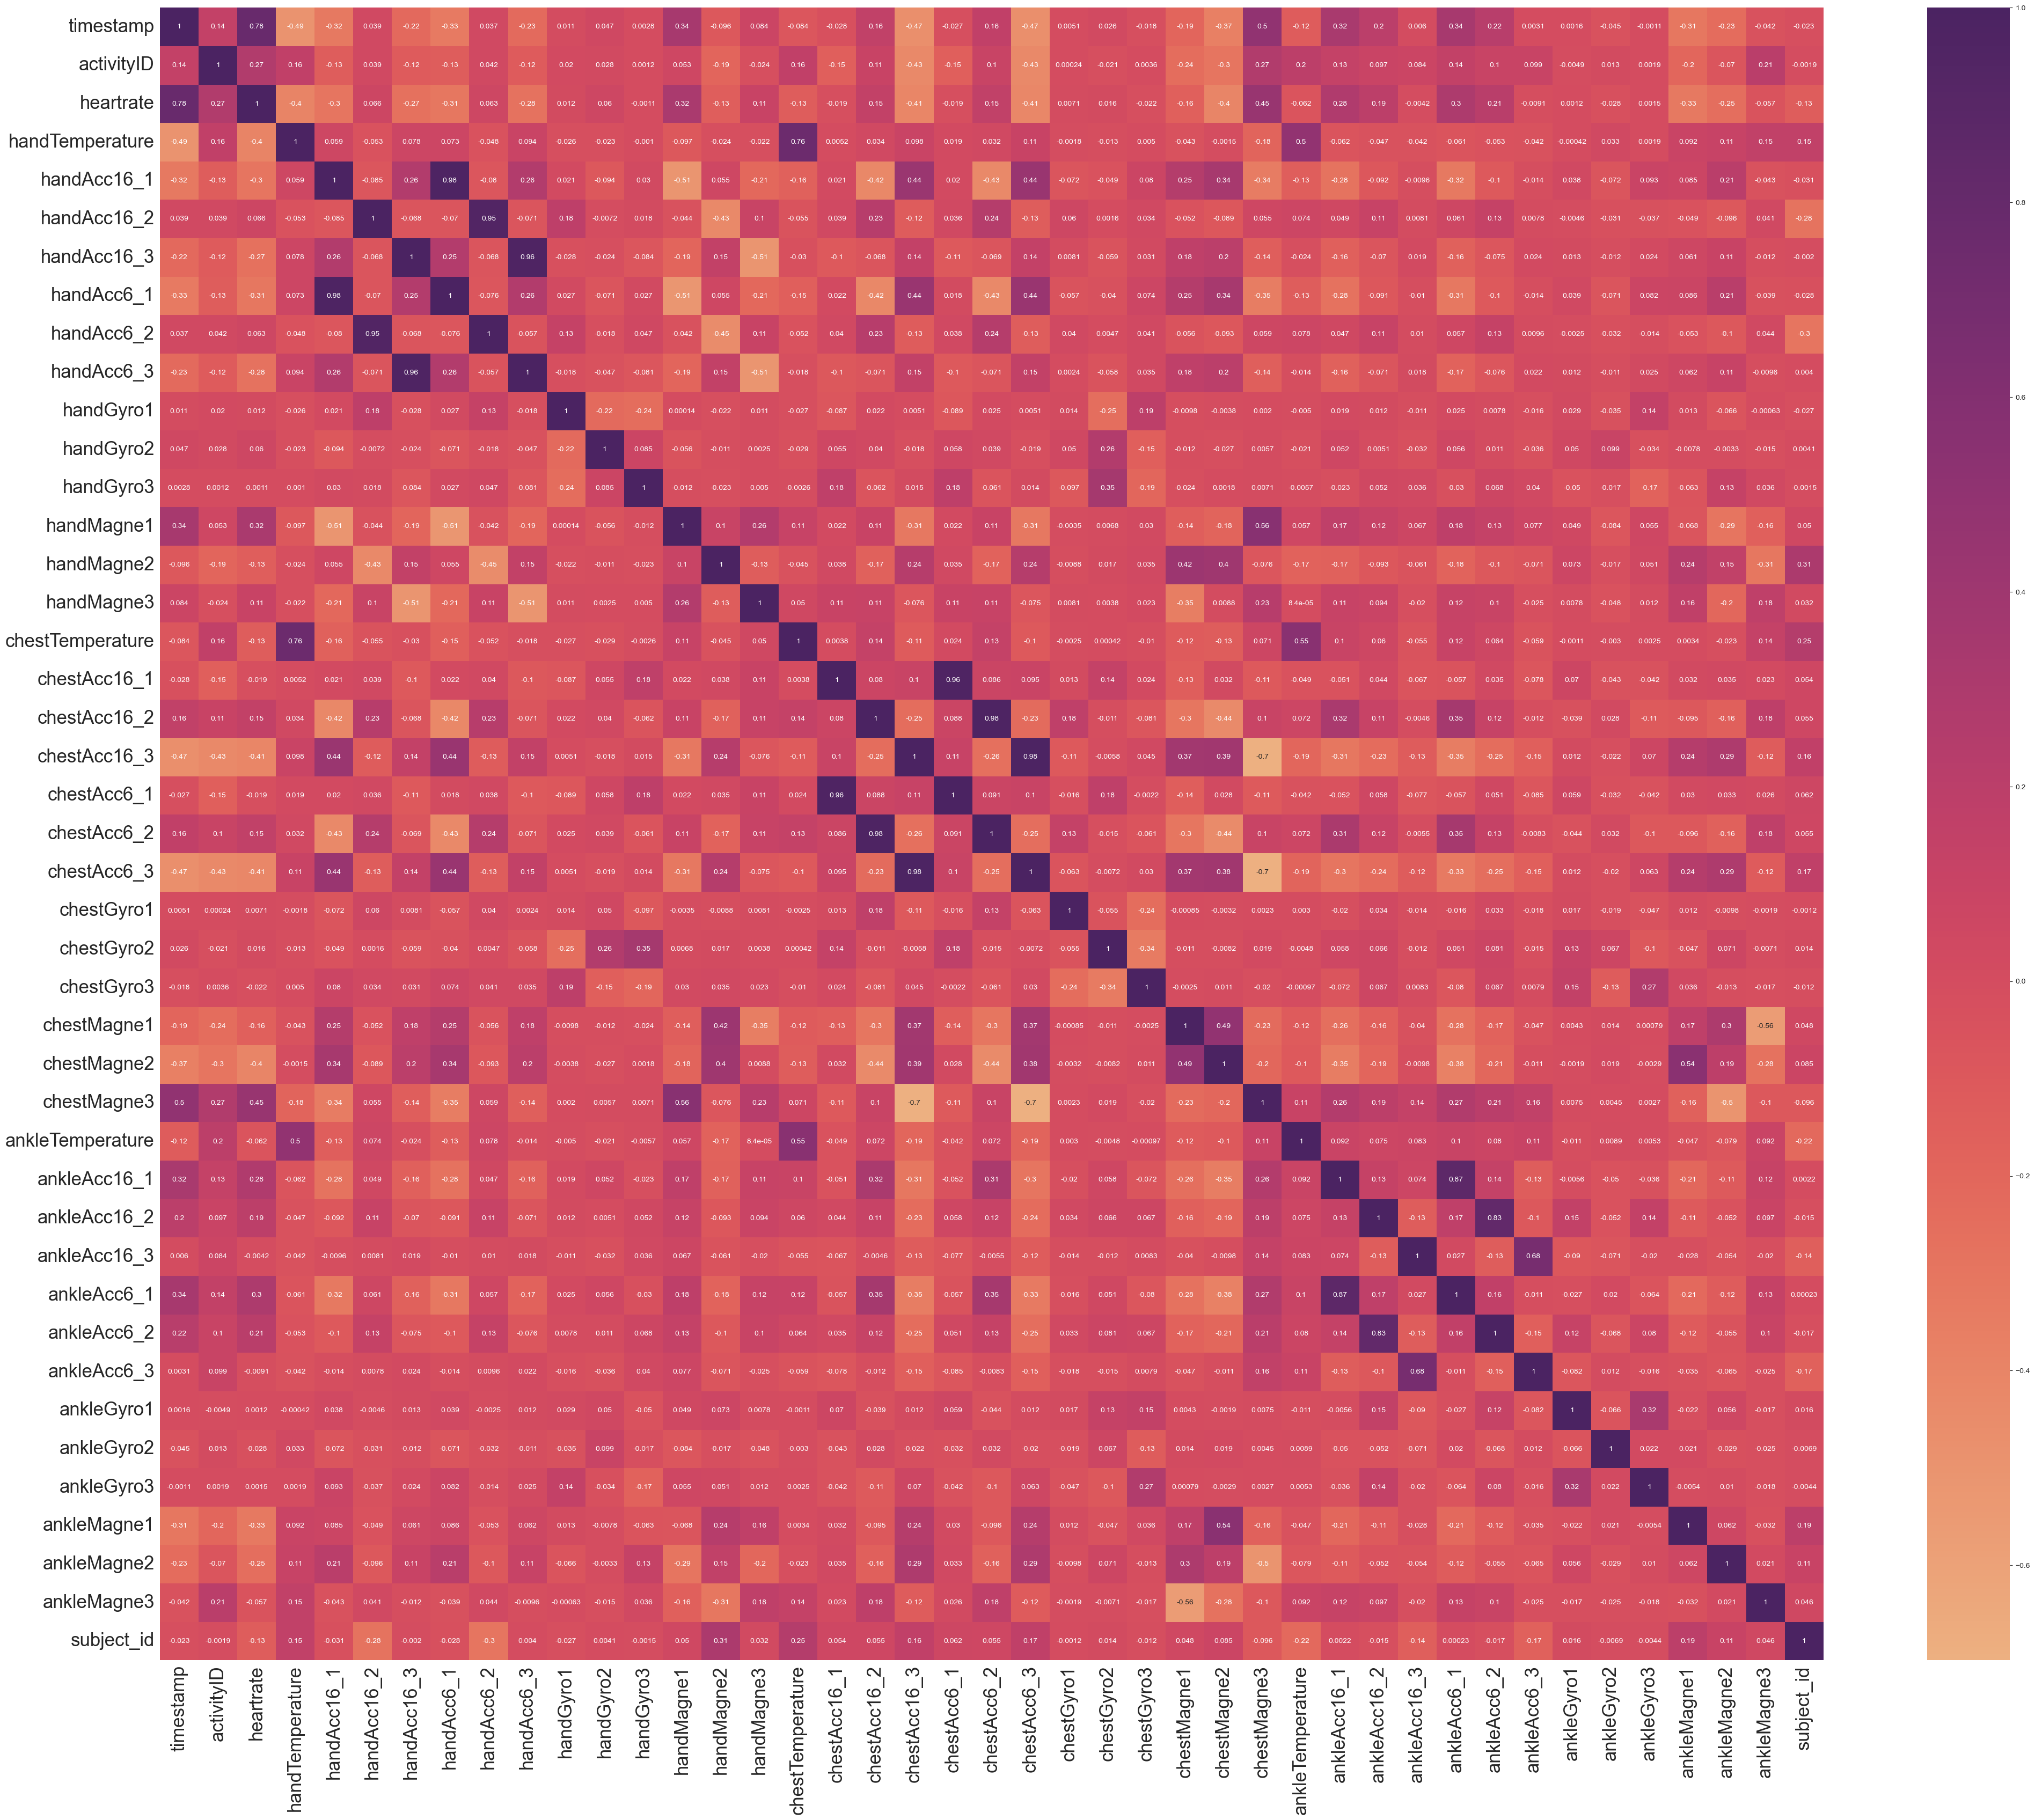

In [26]:
#plotting a heatmap to see the correlation between the variables
plt.figure(figsize = (50,40))
sns.set_style('darkgrid')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
sns.heatmap(cleaned_pamp.corr(method = 'pearson'),annot = True,cmap = sns.color_palette("flare",as_cmap = True))
plt.show()

Heatmap is a type of plot which shows the correlation between the two variables. It shows how the variables are related to each other and how they effect they have on eachother.
- Positive correlation is when the variable values increase and decrease together. When one variable increases, the other also increase and vice versa.
- Negative correlation is when one variable value increase other variable value decreases and vice versa.
- Zero correlation is when there is no relationship between the variables.

Here, the pearson correlation which ranges from -1 to +1 id being used, where -1 is negative correlation, 0 is no correlation and +1 is positive correlation.

- It can be observed that there were less large positive correlation.
- Hand acceleration at 16g has correlation of 0.98 with hand acceleration at 6g, which does not makes sense.
- Chest temperature and heart rate has a negative correlation of -0.13, which is not desirable logically, as when performing exercises the chest temperature increases ideally so does the heart rate, but in this data set it is reverse.
- There are many large negative correlations, mostly with the heart rate and temperatures.

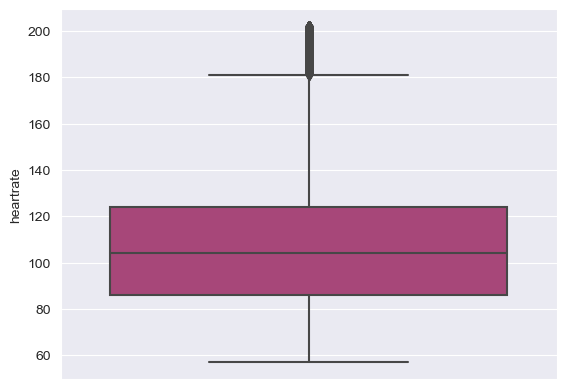

In [27]:
#plotting a box plot for the heart rate column
sns.set_style('darkgrid')
sns.boxplot(y = 'heartrate', data = cleaned_pamp,palette = 'magma')
plt.show()

It can be observed from the box plot, that the 1st quartile starts from 58 and ends at the begining of the inter quartile range 86. 2nd quartile starts from the 86 at an average of 124. 3rd quartile starts from 107.4 and ends at 124. It can also be seen from the plot that heart rate have outliers starting from 180 to 202. 
This box plot also shows that the biggest group of quartile is starting from 124 to 180 which shows that the majority of the subjects heart rate while performing activities were in this range.

In [28]:
#calculating the average heartrate for each activity
heartrate_rel_activity = cleaned_pamp.groupby('activityID')['heartrate'].mean().sort_values(ascending = True)

Here, I calculated the mean heart rate of the subjects while performing an activity.

In [29]:
#shown values are the average heartrate for each activity
heartrate_rel_activity

activityID
1      75.539915
2      80.012614
3      88.554771
17     90.062321
16    104.194956
4     112.786174
7     123.829853
6     124.884246
13    129.156243
12    129.525475
5     156.590944
24    161.985048
Name: heartrate, dtype: float64

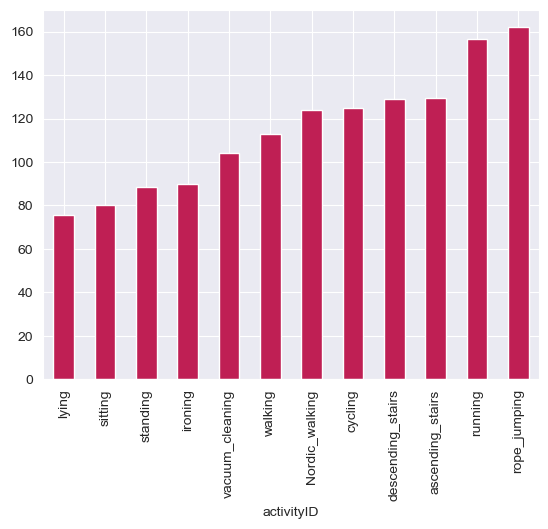

In [30]:
#plotting the average heartrate of each activity using bar chart
heartrate_rel_activity.index = heartrate_rel_activity.index.map(activity_protocol)
heartrate_rel_activity.plot(kind = 'bar',color = '#bf1f54')
plt.show()

This bar chart shows that heart rate is low ranging from 75 - 80 bpm while lying and sitting because the body requires less oxygen and energy during these kind of activities, resulting in a lower heart rate. As it can be seen from the plot, that engaging in a activity like rope jumping and running needs significant amount of physical effort tends to have a high heart rate of over 150 bpm.

In [31]:
#calculating the total timestamp for each activity
subject_activity = cleaned_pamp.groupby(['activityID'])['timestamp'].count().sort_values(ascending = True)

Here, the time is spent on a certain activity is calculated.

In [32]:
#shown values are the total timestamp for each activity
subject_activity

activityID
24     49360
5      98199
13    104944
12    117216
6     164600
16    175353
2     185188
7     188107
3     189931
1     192519
17    238690
4     238761
Name: timestamp, dtype: int64

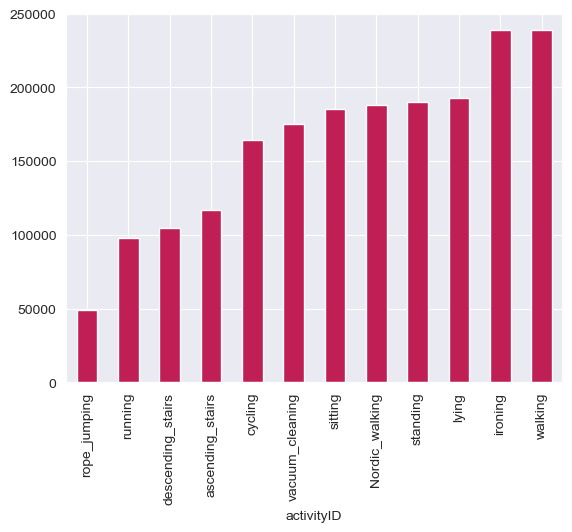

In [33]:
#plotting the total timestamp of each activity using a bar chart
subject_activity.index = subject_activity.index.map(activity_protocol)
subject_activity.plot(kind = 'bar', color = '#bf1f54')
plt.show()

This bar chart shows that how much time is spend on the respective activity by the subjects. It can be analyzed that rope jumping has the lowest time stamp which means that it is the least performed activity by the subjects  while ironing and walking have the highest time stamp of all, means these activities are the most performed activity performed by the subjects.

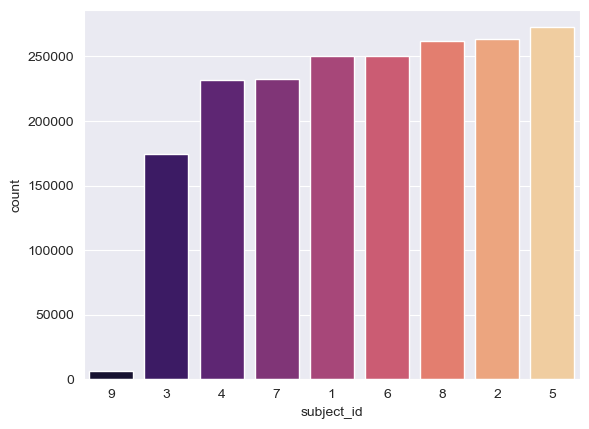

In [34]:
#counting which subject performed how much
sns.countplot(x = 'subject_id',data = cleaned_pamp,palette = 'magma',order = cleaned_pamp['subject_id'].value_counts(ascending = True).index)
plt.show()

This bar chart shows which subject has performed how much in the activity. It can be seen that the subject 9 has performed the least in the activities, I could assume that the sensors developed a faut when subject 9 tried to perform the activity or maybe subject 9 did not participate fully in the activities. Subject 5 performed the most in the activities.

In [35]:
#grouping average of all the variables for each subject
subject_id_mean = cleaned_pamp.groupby(['subject_id']).mean().reset_index()
subject_id_mean

,subject_id,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3
0,1,1713.050771,8.321516,122.190650,32.422795,-4.140330,5.843411,3.736294,-4.101021,5.876592,3.897137,0.058276,0.068615,0.006275,18.528773,-26.921466,-28.033900,35.234377,0.356018,7.862373,-2.476401,0.195822,7.878859,-2.204707,0.003769,0.006127,-0.021893,0.348946,-44.408077,7.943121,33.665029,9.088204,0.653615,-2.630524,9.049293,0.779417,-2.215182,0.003577,0.008968,0.015002,-49.519350,-3.850168,13.562402
1,2,2067.198238,8.452814,109.492739,32.335509,-5.165098,4.827645,3.015019,-5.114576,4.852302,3.166203,0.049894,0.045829,0.001292,18.751684,-17.780020,-22.264311,36.329871,0.269465,7.535848,-4.240437,0.135806,7.519331,-3.960390,0.009539,-0.005887,-0.004111,3.544909,-24.685920,13.018950,34.252763,9.674485,-0.903002,-1.603954,9.655922,-0.820716,-1.161208,-0.032105,-0.059540,-0.000485,-28.827144,1.240838,17.122231
2,3,1230.093365,7.923270,95.105546,31.886316,-4.521142,4.378806,3.649820,-4.492908,4.395570,3.773161,0.000653,-0.023341,-0.052287,16.702605,-14.403286,-23.472023,35.801542,-0.112478,8.146200,0.621724,-0.259310,8.148064,0.928260,0.003997,-0.006780,-0.022690,7.243933,-24.504131,-3.434182,33.531945,9.165003,-1.138903,-1.436834,9.163704,-1.045383,-1.031737,-0.006836,-0.035369,0.028121,-24.793782,3.956014,17.872399
3,4,1559.265968,7.502979,109.434100,31.901968,-5.995209,3.384448,4.264892,-5.944091,3.403367,4.417618,-0.024320,0.014295,-0.003426,29.849936,-13.072450,-25.755028,35.123014,0.218710,7.899183,-1.500048,0.042802,7.895458,-1.203121,0.004280,0.015613,-0.028894,6.050942,-28.710709,5.841472,33.577852,9.448897,0.784826,-1.643911,9.445745,0.923170,-1.191158,0.019843,-0.052051,0.011716,-27.818907,-2.984188,15.669378
4,5,1825.762057,8.081195,108.526989,34.769571,-4.302963,5.539761,3.613392,-4.161100,5.556799,3.861057,0.010293,0.037899,0.027147,18.684425,-19.825097,-23.419904,37.446359,0.380284,8.588173,-0.820224,0.296125,8.581909,-0.447199,0.005267,0.018118,-0.027034,5.684408,-30.919819,2.276853,34.203705,9.729196,0.121775,-3.321066,9.715181,0.223364,-2.911763,0.006621,-0.040835,0.024440,-31.995869,2.610375,19.965522
5,6,1718.915039,7.838130,103.001006,32.300070,-5.022242,4.860823,3.546284,-4.964660,4.699788,3.772924,0.021817,0.055545,0.003996,21.911607,-15.756386,-25.217874,35.831370,0.459791,8.277008,-0.843876,0.313385,8.283788,-0.466174,0.010145,0.026931,-0.030471,4.579561,-28.606691,1.843282,34.721871,9.516931,0.121721,-2.583625,9.481191,0.243919,-2.082088,0.013554,-0.041795,0.011276,-30.393161,1.440972,18.911176
6,7,1539.462669,7.848850,96.390682,32.946647,-5.401629,4.314807,3.872403,-5.317811,4.324187,4.038232,-0.008517,0.015615,0.010027,22.552573,-13.934832,-22.760363,36.767444,0.436127,8.514452,-0.831527,0.317631,8.503946,-0.501902,0.004688,0.015785,-0.027062,4.892580,-30.990274,2.277916,32.233119,9.126389,-0.407193,-3.683455,9.079551,-0.283341,-3.366934,0.022572,-0.052123,-0.006433,-26.543630,0.176194,18.889100
7,8,1827.730716,8.149140,110.026446,33.154257,-5.196201,-4.194723,3.366793,-5.128319,-4.238858,3.596163,-0.105477,0.078293,-0.037573,22.234812,10.059625,-24.051367,36.700240,0.515049,8.358478,-0.740099,0.397158,8.336230,-0.349656,0.002327,0.019047,-0.022801,4.129148,-30.656164,3.561974,33.345786,9.383248,-0.699332,-3.419072,9.311358,-0.624059,-3.020515,0.049483,-0.021145,-0.024305,-30.202335,9.086786,16.164870
8,9,63.150000,24.000000,148.525960,25.051254,-0.721494,8.901049,-1.209895,-0.826677,8.998069,-1.349825,0.321421,0.061032,0.146198,7.600413,-37.833887,-21.308027,32.235624,0.254559,9.233400,-3.399658,

Here, the mean of all the variables for each of the subjects is being calculated.

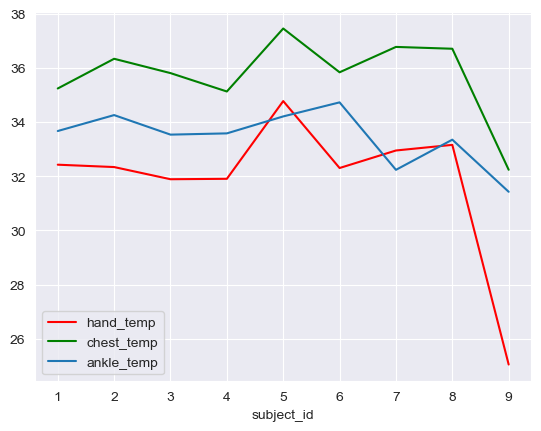

In [36]:
#plotting the average handtemperature for all the subjects 
plt.plot(subject_id_mean['subject_id'],subject_id_mean['handTemperature'],color = 'r',label = 'hand_temp')
#plotting the average chesttemperature for all the subjects
plt.plot(subject_id_mean['subject_id'],subject_id_mean['chestTemperature'],color = 'g',label = 'chest_temp')
#plotting the average ankletemperature for all the subjects
plt.plot(subject_id_mean['subject_id'],subject_id_mean['ankleTemperature'],label = 'ankle_temp')
plt.legend(loc = 'lower left')
plt.xlabel('subject_id')
plt.show()

This line plot shows the hand, chest and ankle temperature of the subjects while performing the activities. It can be seen that the lowest temperatures was recorded from the hand and the highest temperature was recorded from the chest. The reason for the highest temperature for the chest could be high heart rate while performing the activity by the subjects. There is a sudden drop of temperature at the subject 9. This proofs the above visualization, which shows that the subject 9 participated the least in the activity. When participated the least during the activity, it is understood that the temperatures on all 3 points will be at their lowest.
Subject 5 has the highest temperature on chest and hand maybe due to performing on those activites which required the most effort.

In [37]:
#subsetting new data frames for
#cycling
activity_cycling = cleaned_pamp[cleaned_pamp['activityID'] == 6]
#nordic walking
activity_nordic_walking = cleaned_pamp[cleaned_pamp['activityID'] == 7]
#ascending stairs
activity_ascend_stairs = cleaned_pamp[cleaned_pamp['activityID'] == 12]
#descending stairs
activity_descend_stairs = cleaned_pamp[cleaned_pamp['activityID'] == 13]

# 5. Hypothesis Testing

Hypothesis testing is a statistical method where we test the assumptions based on a sample of data. 
There are two main types of hypothesis performed in hypothesis testing:
- (H0) The null hypothesis represents the base line assumption, stating that there is no significant difference.
- (Ha) The alternative hypothesis represents the assumption stating that there is a significant difference.

The alpha determines whether the null hypothesis will be rejected or not. 0.05 is commonly used as a threshold, and in this hypothesis testing, I will be using 0.05 as a threshold to reject or accept the null hypothesis.


In this report, the set of hypothesis which will be tested was determined during when I performed the exploratory data analysis. How heart rate is fluctuating during the respective activities will be tested in this hypothesis, and it will be then examined how much the evaluation is accurate.

##### Hypothesis 1

- Null Hypothesis (H0): heart rate are on average the same when the subjects are ascending stairs as when they are descending stairs.

- Alternative Hypothesis (Ha):heart rate are on average higher when the subjects are ascending stairs as when they are descending stairs.

In [38]:
#calculating mean for ascending stairs
ascend_stairs_mean = activity_ascend_stairs['heartrate'].mean()
#calculating standard deviation for ascending stairs
ascend_stairs_std = activity_ascend_stairs['heartrate'].std()
#calculating mean for descending stairs
descend_stairs_mean = activity_descend_stairs['heartrate'].mean()
#calculating standard deviation for descending stairs
descend_stairs_std = activity_descend_stairs['heartrate'].std()

ascend_descend_mean = ascend_stairs_mean - descend_stairs_mean
ascend_descend_std = (ascend_stairs_std**2)/activity_ascend_stairs['heartrate'].count()+(descend_stairs_std**2)/activity_descend_stairs['heartrate'].count()
ascend_descend_errors = ascend_descend_mean / ascend_descend_std
#calculating pvalue
pval = 1 - stats.norm.cdf(ascend_descend_errors)

print("ascend_descend_mean:",ascend_descend_mean)

#condition to get N0 rejected or accepted
if pval < 0.05:
    print("pvalue", pval, ",H0 is rejected")
else:
    print("pvalue", pval, ",H0 cannot be rejected")

ascend_descend_mean: 0.36923159380182824
pvalue 0.0 ,H0 is rejected


**Result**: The mean of heart rate while ascending stairs minus descending stairs is 0.44. The pvalue is 0.0. So, H0 is rejected and Ha is accepted.

##### Hypothesis 2

- Null Hypothesis (H0): heart rate are on average the same when the subjects are cycling as when they are nordic walking.

- Alternative Hypothesis (Ha):heart rate are on average higher when the subjects are cycling as when they are nordic walking.


In [39]:
#calculating mean for cycling
cycling_mean = activity_cycling['heartrate'].mean()
#calculating standard deviation for cycling
cycling_std = activity_cycling['heartrate'].std()
#calculating mean for nordic walking
nordic_walking_mean = activity_nordic_walking['heartrate'].mean()
#calculating standard deviation for nordic walking
nordic_walking_std = activity_nordic_walking['heartrate'].std()

cyclic_nordic_mean = cycling_mean - nordic_walking_mean
cyclic_nordic_std = (cycling_std**2)/activity_cycling['heartrate'].count()+(nordic_walking_std**2)/activity_nordic_walking['heartrate'].count()
cyclic_nordic_errors = cyclic_nordic_mean / cyclic_nordic_std
#calculating pvalue
pval = 1 - stats.norm.cdf(cyclic_nordic_errors)

print("cyclic_nordic_mean:",cyclic_nordic_mean)

#condition to get N0 rejected or accepted
if pval < 0.05:
    print("pvalue", pval, ",H0 is rejected")
else:
    print("pvalue", pval, ",H0 cannot be rejected")

cyclic_nordic_mean: 1.0543922758531465
pvalue 0.0 ,H0 is rejected


**Result**: The mean of heart rate while cycling minus nordic walking is 1.06. The pvalue is 0.0. So, H0 is rejected and Ha is accepted.

# 6. Modelling

Copying the dataframe so that original dataframe stays the same.

In [40]:
#copying the dataframe
cleaned_pamp_copy = cleaned_pamp.copy()

Dropping the timestamp and subject id column as it is irrelevant for the prediction.

In [41]:
#dropping the columns
cleaned_pamp_copy = cleaned_pamp_copy.drop(['timestamp','subject_id'],axis = 1)

As the above data analysis shows that the data set contains outliers. As such there is a need to deal with it, because in a case when the data is not normally distributed, the model will not work efficiently.
To deal with this kind of data here the Robust Scaler technique is being employed
to scale the numerical data.

In [42]:
#initializing robust scaler
robust_scaler = RobustScaler()

In [43]:
cleaned_pamp_copy.head()

,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3
0,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,32.1875,0.352225,9.72437,-1.68665,0.173568,9.69512,-1.53414,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,30.75,9.77578,-1.88582,0.095775,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847
1,1,100.0,30.375,2.07165,7.25965,6.01218,2.19238,7.21038,6.01604,0.063895,0.007175,0.024701,8.60505,-66.7184,-19.8429,32.1875,0.271221,9.64826,-1.84275,0.188981,9.72523,-1.50392,-0.002481,-0.018131,-0.045486,1.010820,-50.4054,44.1573,30.75,9.65780,-1.92147,-0.098161,9.60177,-1.75239,0.311276,0.003793,-0.026906,0.004125,-61.3257,-36.9744,-57.7501
2,1,100.0,30.375,2.41148,7.59780,5.93915,2.23988,7.46679,6.03053,0.190837,0.003116,0.038762,9.16003,-66.8578,-19.9665,32.1875,0.274553,9.61139,-1.72641,0.158971,9.67993,-1.44342,0.024609,-0.022451,-0.033739,1.261700,-50.9669,43.5475,30.75,9.65839,-1.80756,-0.098862,9.67694,-1.76748,0.326060,0.036814,-0.032277,-0.006866,-61.5520,-36.9632,-57.9957
3,1,100.0,30.375,2.32815,7.63431,5.70686,2.31663,7.64745,6.01495,0.200328,-0.009266,0.068567,9.47898,-67.3025,-20.6693,32.1875,0.238925,9.68733,-1.64986,0.173916,9.66480,-1.44355,0.012477,-0.000388,-0.031705,0.355493,-51.1679,44.3915,30.75,9.65690,-1.88318,-0.136998,9.61685,-1.76749,0.326380,-0.010352,-0.016621,0.006548,-61.5738,-36.1724,-59.3487
4,1,100.0,30.375,2.25096,7.78598,5.62821,2.28637,7.70801,5.93935,0.204098,-0.068256,0.050000,9.15218,-67.0705,-20.3159,32.1875,0.349738,9.64854,-1.76389,0.188777,9.66481,-1.47387,0.017892,-0.018287,-0.037089,0.125653,-50.9288,43.5303,30.75,9.77727,-1.81020,0.133911,9.61686,-1.72212,0.326234,0.039346,0.020393,-0.011880,-61.7741,-37.1744,-58.1199


In [44]:
cleaned_pamp_copy.shape

(1942868, 41)

Here, in this cell the scaling is performed on the data.

In [45]:
#applying robust scaler
scaled_pamp_copy = robust_scaler.fit_transform(cleaned_pamp_copy)

PCA is then used to reduce the number of features, this would result in improving the performace of the model.PCA is a dimensionality reduction technique commonly used when the data set contains many features. It reduces the number of features while the important information remain present. PCA transforms the original features into a new set.

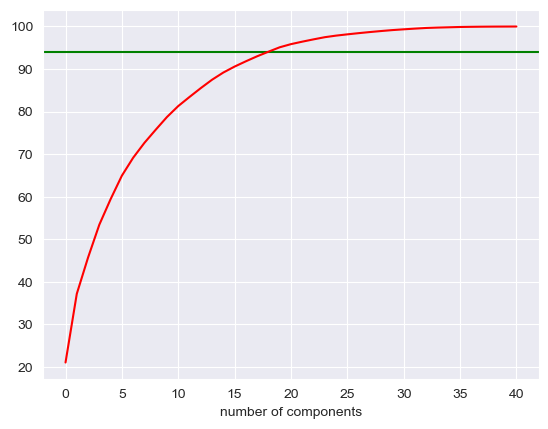

In [46]:
#initializing pca
pca = PCA()
#fitting pca
pca.fit(scaled_pamp_copy)
variance_components = np.cumsum(np.round(pca.explained_variance_ratio_,decimals = 4)*100)
x = plt.axhline(94,color = 'g')

plt.xlabel("number of components")
plt.plot(variance_components,color = 'r')

From the above graph, I can analyze that both the lines meet at x = 17, which means I need 17 features.

In [47]:
#creating pca componensts for 17 features
pca = PCA(n_components = 17)
#fitting the data
pca_scaled_pamp = pca.fit_transform(scaled_pamp_copy)

In [48]:
#creating a dataframe to show the 17 columns created by the pca
df_pca_scaled_pamp = pd.DataFrame(pca_scaled_pamp,columns = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13','PCA14','PCA15','PCA16','PCA17'])
df_pca_scaled_pamp

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17
0,-0.346229,0.131851,-0.199241,0.234154,0.319687,-0.061876,0.336788,-1.584684,0.527673,-0.329490,0.656989,0.331340,0.860879,-0.291283,-0.309383,0.077262,0.536785
1,-0.285898,0.115582,-0.257818,0.159484,0.313384,-0.133099,0.305024,-1.611740,0.503963,-0.263569,0.761169,0.308961,0.726891,-0.225994,-0.288399,0.051715,0.539014
2,-0.305936,0.054919,-0.191711,0.197980,0.335495,-0.262023,0.329237,-1.673663,0.406118,-0.211018,0.884426,0.349948,0.667998,-0.237287,-0.277297,0.022351,0.530094
3,-0.294997,0.118603,-0.306115,0.161447,0.270618,-0.195756,0.291226,-1.725614,0.395387,-0.175442,0.886296,0.291099,0.675749,-0.220148,-0.285697,0.047387,0.544789
4,-0.336221,0.063140,-0.287338,0.032930,0.331033,-0.334654,0.224159,-1.789413,0.317702,-0.259252,0.861668,0.323126,0.715116,-0.295432,-0.336173,0.120357,0.515963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942863,0.087665,0.083756,-0.297141,0.168208,0.550558,0.195106,-0.593178,-0.719801,0.352937,-0.184074,0.421271,0.803206,0.852277,0.769579,0.022825,-0.016486,1.259558
1942864,0.135824,0.138577,-0.319767,0.111898,0.525828,0.116187,-0.420376,-0.663542,0.147135,-0.244676,0.450829,0.847636,0.813826,0.787733,-0.061246,-0.008782,1.222435
1942865,0.137116,0.166719,-0.256138,0.263802,0.461845,0.141237,-0.196694,-0.629387,0.051226,-0.256740,0.434860,0.854491,0.774134,0.691873,-0.129645,-0.015947,1.288783
1942866,0.080021,0.171046,-0.279304,0.288077,0.465772,0.127172,-0.183826,-0.629465,0.064601,-0.209146,0.444200,0.875438,0.673813,0.627291,-0.150991,0.007218,1.260290


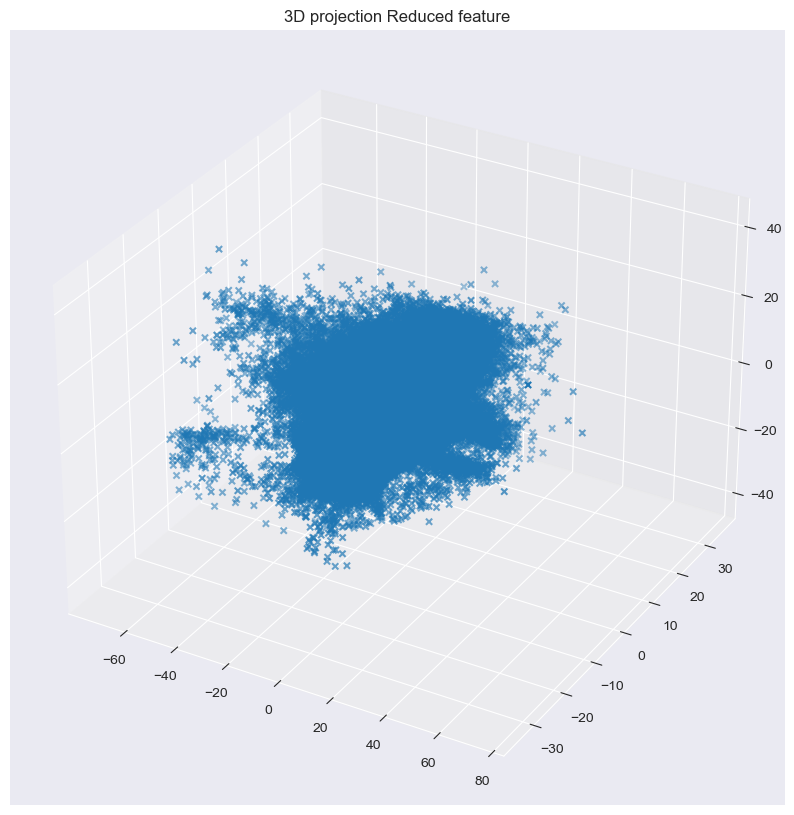

In [49]:
x1 = df_pca_scaled_pamp['PCA1']
x2 = df_pca_scaled_pamp['PCA2']
x3 = df_pca_scaled_pamp['PCA3']

fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(x1,x2,x3,marker = 'x')
ax.set_title("3D projection Reduced feature")
plt.show()

Using the elbow method in K-means clustering, the WCSS (Within-Cluster Sum of Square) is calculated. It represents the sum of squared distance between each point and centroid in a cluster.
It helps the data scientist to find the best number of cluster for KMeans algorithm.

In [54]:
#calculating the wcss for the best value for number of clusters
wcss = [] 
for i in range(1,10):
    kmeans_cluster = KMeans(n_clusters = i, init = 'k-means++',random_state = 30)
    kmeans_cluster.fit(df_pca_scaled_pamp)
    wcss.append(kmeans_cluster.inertia_)

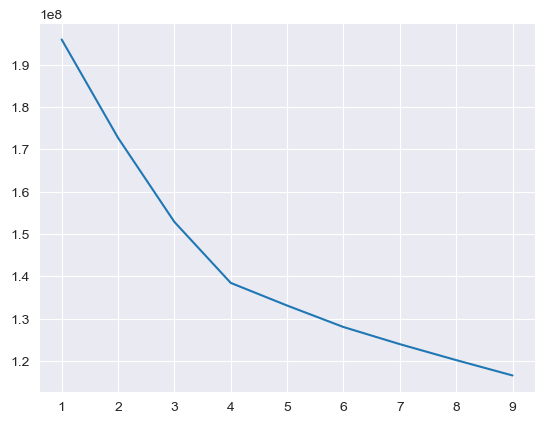

In [55]:
#plotting the wcss values to find the best value
k = [1,2,3,4,5,6,7,8,9]
sns.lineplot(x = k, y = wcss)
plt.show()

The line plot above, shows that the elbow is created at point 4, so n_cluster can be 4, as after point 4, the line seems to become stable.

Here,k = 4, that is 4 clusters will be made.

In [56]:
#initializing KMeans

kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_pca_scaled_pamp)
predict_kmeans = kmeans.predict(df_pca_scaled_pamp)

In [57]:
df_pca_scaled_pamp['Cluster_4'] = predict_kmeans
cleaned_pamp_copy['Clusters_4'] = predict_kmeans

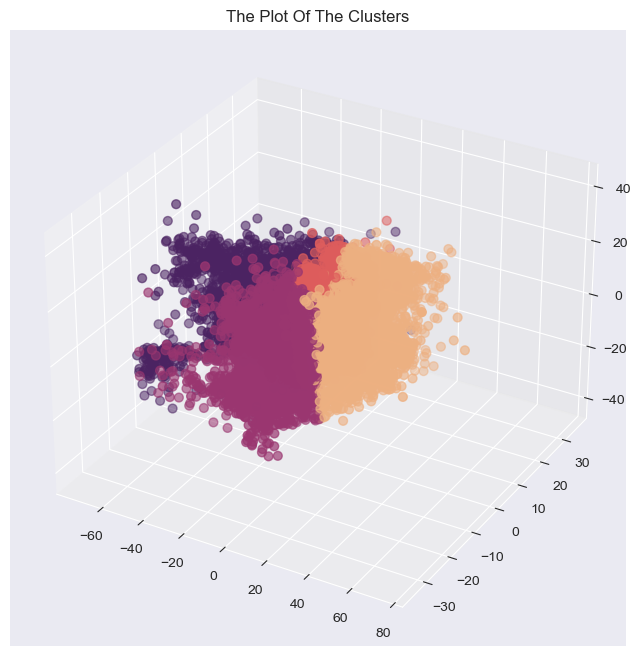

In [58]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x1, x2, x3, s=40, c= df_pca_scaled_pamp["Cluster_4"], cmap = sns.color_palette("flare", as_cmap=True) )
ax.set_title("The Plot Of The Clusters")
plt.show()

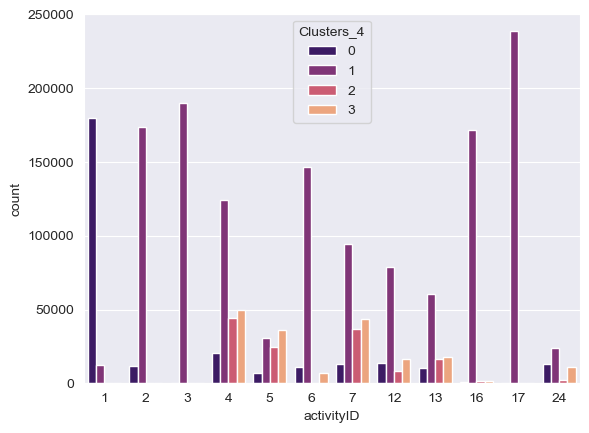

In [59]:
sns.countplot(x = 'activityID', hue = 'Clusters_4', data = cleaned_pamp_copy,palette = 'magma')
plt.show()

Now, having k = 3, i.e 3 clusters will be made.

In [60]:
#initializing KMeans

kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_pca_scaled_pamp)
predict_kmeans = kmeans.predict(df_pca_scaled_pamp)

In [61]:
df_pca_scaled_pamp['Cluster_3'] = predict_kmeans
cleaned_pamp_copy['Clusters_3'] = predict_kmeans

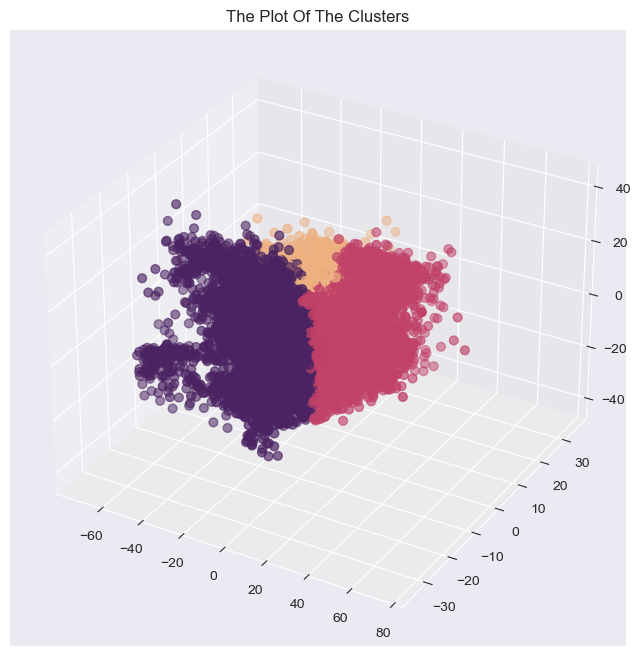

In [62]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x1, x2, x3, s=40, c= df_pca_scaled_pamp["Cluster_3"], cmap = sns.color_palette("flare", as_cmap=True) )
ax.set_title("The Plot Of The Clusters")
plt.show()

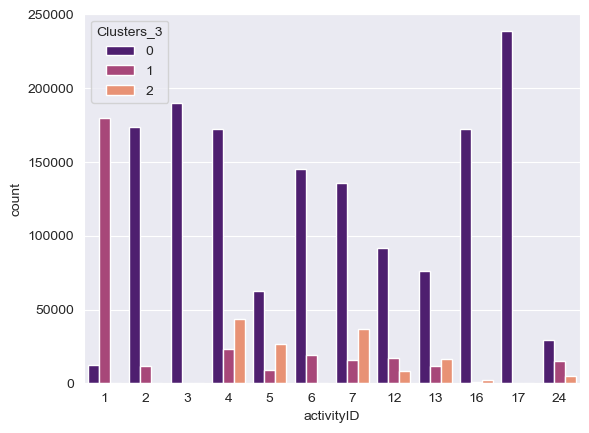

In [63]:
sns.countplot(x = 'activityID', hue = 'Clusters_3', data = cleaned_pamp_copy,palette = 'magma')
plt.show()

k = 5 here, meaning 5 clusters will be made.

In [64]:
#initializing KMeans

kmeans = KMeans(n_clusters = 5)
kmeans.fit(df_pca_scaled_pamp)
predict_kmeans = kmeans.predict(df_pca_scaled_pamp)

In [65]:
df_pca_scaled_pamp['Cluster_5'] = predict_kmeans
cleaned_pamp_copy['Clusters_5'] = predict_kmeans

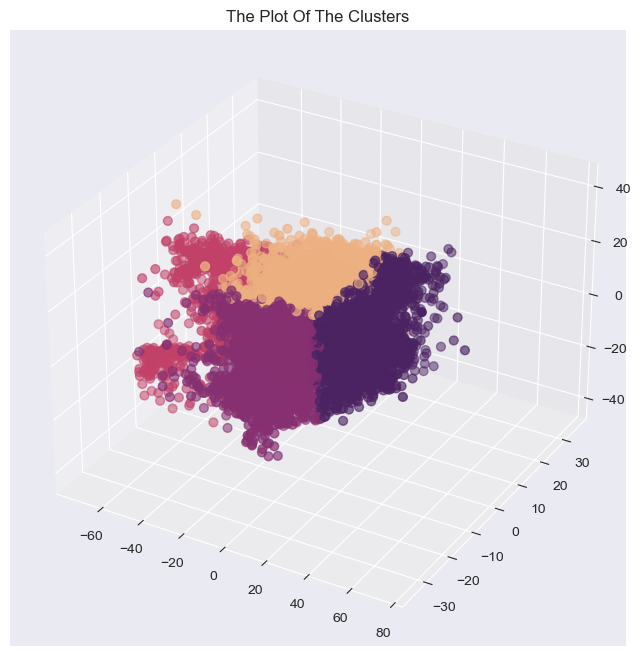

In [67]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x1, x2, x3, s=40, c= df_pca_scaled_pamp["Cluster_5"], cmap = sns.color_palette("flare", as_cmap=True) )
ax.set_title("The Plot Of The Clusters")
plt.show()

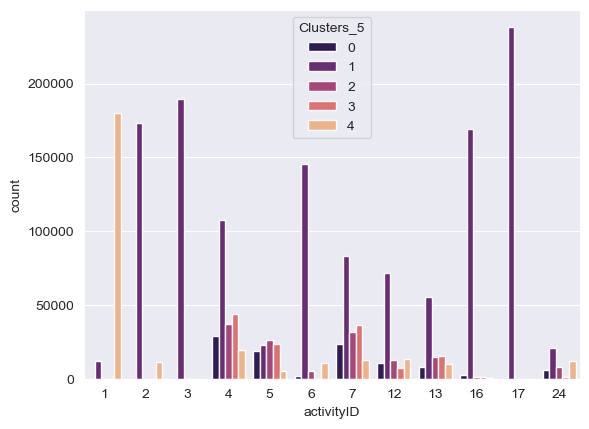

In [68]:
sns.countplot(x = 'activityID', hue = 'Clusters_5', data = cleaned_pamp_copy,palette = 'magma')
plt.show()

In [69]:
#calculating adjusted rand score between cluster 4 and 5
print("Adjusted Rand Score between number of cluster 4 and 5: ", adjusted_rand_score(cleaned_pamp_copy['Clusters_4'],cleaned_pamp_copy['Clusters_5']))

Adjusted Rand Score between number of cluster 4 and 5:  0.9006953876889807


In [70]:
#calculating adjusted rand score between cluster 3 and 4
print("Adjusted Rand Score between number of cluster 3 and 4: ", adjusted_rand_score(cleaned_pamp_copy['Clusters_3'],cleaned_pamp_copy['Clusters_4']))

Adjusted Rand Score between number of cluster 3 and 4:  0.7085597512687362


In [71]:
#calculating adjusted rand score between cluster 3 and 5
print("Adjusted Rand Score between number of cluster 3 and 5: ", adjusted_rand_score(cleaned_pamp_copy['Clusters_3'],cleaned_pamp_copy['Clusters_5']))

Adjusted Rand Score between number of cluster 3 and 5:  0.6423243562314803


An adjusted rand score of 0.89 indicates a high agreement between the cluster 4 and 5, this means that the clusters produced by the kmeans accurately match the true clusters.
An adjusted rand score of 0.71 indicates a decent agreement between the clusters 3 and 4, it is slightly less than the previous clusters this means that there are some differences although the model works well.
Whereas, adjusted rand score between cluster 3 and 5 is 0.64, which is an average agreement because there are notable differences.

# 7. Conclusion

To conclude the analysis:
  - Average heart rate is 107.4 bpm.
  - Running and rope jumping are the kind of activities the subject can perform to stay fit.
  - Lying, sitting and standing are the kind of activities the subject has to avoid weakness.
  - Subject 5 was very active as he/she participated the most in the activity.
  - By performing the hypothesis, it was analyzed that ascending stairs requires more effort means more heart rate than compared to descending stairs as when subject is descending down the stairs, subject is moving with the gravity, not against the gravity.
  - In second hypothesis, it was analyzed that to stay fit, the subject can perform cycling instead of nordic walking.
  - By performing extensive exploratory data analysis, it was observed that there the data set has an imbalance. The insights were that, activityID were not equal. High intensity excercise like rope jumping and running have very less time stamps, while, low intensity activity like ironing and walking have high time stamps.
  - Subject 9 participation was almost very less, when compared to other subjects, this can be eliminated from the data set.
  - Upon calculating the adjusted rand score, it was noticeable that the clusters 4 and 5 are best number of clusters for this kind of data set.
  

# 8. References

- https://datagy.io/python-z-score/
- https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/
- https://www.geeksforgeeks.org/exploring-correlation-in-python/
- https://www.simplilearn.com/tutorials/machine-learning-tutorial/principal-component-analysis
- https://github.com/andreasKyratzis/PAMAP2-Physical-Activity-Monitoring-Data-Analysis-and-ML/
- https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/
- https://www.simplilearn.com/tutorials/machine-learning-tutorial/logistic-regression-in-python
- https://www.tutorialspoint.com/what-is-hypothesis-in-machine-learning
- https://towardsdatascience.com/hypothesis-testing-for-data-scientists-everything-you-need-to-know-8c36ddde4cd2
- https://towardsdatascience.com/hypothesis-testing-for-data-scientists-everything-you-need-to-know-8c36ddde4cd2
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
- https://stackabuse.com/bytes/agglomerative-hierarchical-clustering-with-scikit-learn/